# Image Processor Walkthrough
Authors: Matt Guptil, Howard Li, Stephen Xu

For our image processor project, we created a ReactJS GUI, which can be accessed from our `bme590final` repo

But this React GUI is not super reliable. Therefore we have created this Jupyter Notebook to demonstrate the functionality of our web server. 

## Getting Started

If you want to run this Jupyter Notebook locally, be sure to clone our entire repo, and start Jupyter Notebook in that cloned folder.

Please read and follow along, executing each cell will show you how our webserver works

### Starting the webserver

Our webserver is running at http://vcm-7308.vm.duke.edu:5000/API-ENDPOINTS

But if the server goes down, you can also run `img_processor_web_server.py` locally. Be sure the last line is set to `app.run(host="127.0.0.1")`





---
## Step 1

Initialize the python environment by running the below block of code



In [1]:
import imageio
import requests
from helper import *
from img_processor_web_server import *
from matplotlib import pyplot as plt

domain = "vcm-7308.vm.duke.edu:5000"
# Alternatively, if you are running the webserver locally, un-comment the below line
# domain = "127.0.0.1:5000" 

# The below variables are sample images we are using for demonstration purposes
id_list = []  # This is needed for downloading
dog_source = "images_for_testing/gray_dog.jpg"
dog_source_2 = "images_for_testing/color_dog.jpg"
dog_image = imageio.imread(dog_source)
dog_image_2 = imageio.imread(dog_source_2)
image_format = determine_format(dog_source)

Our webserver allows multiple, unique users. Input your email below to be added as a unique user. The email needs to be in the proper format or else you will get errors later in this Jupyter Notebook environment

In [2]:
email = "blah@blah.com"

## Step 2 - Uploading Images

Our webserver communicates with the client/user's GUI through JSON files. Anything POSTed to the webserver should be a JSON dictionary, and the content that is returned is a dictionary as well. This dictionary contains different attributes:
 * Image_id
 * filename
 * image_data
 * email
 * timestamp
 * width
 * height
 * format
 * description
 * parent_id 
 * child_ids 
 * process_history
 * processing_time
 * process
 
These attributes can be referenced and manipulated with different API endpoints. 

This is an example of uploading a single image to the webserver. It returns a JSON of the database image and sets it as the "current image"

In [3]:
image_obj = {
    "email": email,
    "image_data": numpy_to_b64str(
        dog_image, format=image_format),
    "filename": dog_source
}
resp = requests.post(
    "http://{}/api/process/upload_image".format(domain),
    json=image_obj)
content = byte_2_json(resp)
id_list.append(content["image_id"])  # used for downloading


All returned images can be displayed, and the histogram of the image data is also returned.

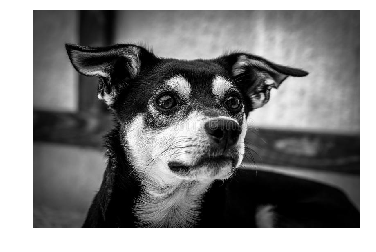

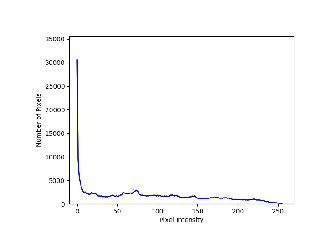

In [4]:
view_image(b64str_to_numpy(content["image_data"]))
view_image(b64str_to_numpy(content["histogram"]))

This is an example of uploading a multiple images to the webserver. It returns a JSON of the last database image that was processed and sets it as "current image"

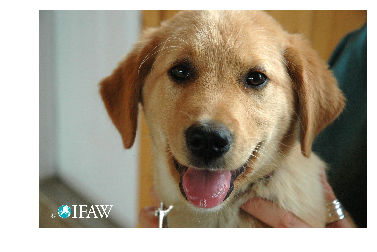

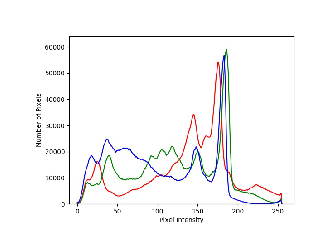

In [5]:
image_obj_2 = {
    "email": email,
    "image_data": numpy_to_b64str(
        dog_image_2, format=image_format),
    "filename": dog_source_2
}
resp = requests.post(
    "http://{}/api/process/upload_image".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
view_image(b64str_to_numpy(content["image_data"]))
view_image(b64str_to_numpy(content["histogram"]))

From here on, we will stop displaying the histograms, we think you get the idea.

You can also upload a zip file of images. The webserver will process the zip file and return a JSON of the last database image that was processed and sets it as "current image"

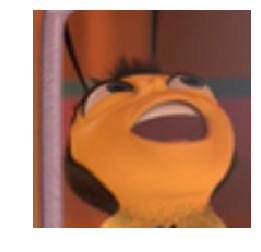

In [6]:
zip_file = "tests/images_for_testing/test_folder.zip"
image_obj_3 = {
    "email": email,
    "image_data": zip_to_b64(zip_file),
    "filename": zip_file
}
resp = requests.post(
    "http://{}/api/process/upload_image".format(domain),
    json=image_obj_3)
content = byte_2_json(resp)
view_image(b64str_to_numpy(content["image_data"]))

The user can obtain a history of all the images they have uploaded using the `get_original_images` endpoint

In [7]:
resp = requests.get(
    "http://{}/api/user/get_original_uploads/{}".format(domain, email))
# But this is too big to display in a juypter notebook

On the webserver, the user's current image, and most recent API endpoint call is stored. The user can also "scroll" through parent and child images, thus keeping a record of their action history

In [8]:
resp = requests.post(
    "http://{}/api/process/upload_image".format(domain),
    json=image_obj)
content = byte_2_json(resp)
print("Current Image ID (image 1 ID): ",
      content["image_id"])
# -------------
resp = requests.post(
    "http://{}/api/process/upload_image".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
print("Current Image ID (image 2 ID): ",
      content["image_id"])

Current Image ID (image 1 ID):  VCFCROTNTU
Current Image ID (image 2 ID):  EHVEFBGNMP


## Step 3: Processing Images

Let's explore how image processing works. Run the below block of code to intialize and upload the first image. 

IMAGE WE WANT TO PROCESS


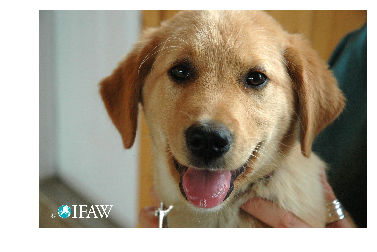

In [9]:
resp = requests.post(
    "http://{}/api/process/upload_image".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
print('IMAGE WE WANT TO PROCESS')
view_image(b64str_to_numpy(content["image_data"]))

There are several API endpoints that processes the image. These include: sharpen, blur, log compression, contrast stretching, histogram equalization, and reverse video. When these endpoints are called, the server performs the actions on the current image and gives it back to the user *without* storing the processed image on the database yet. Run the below block of code to see the image being processed. 

Sharpen


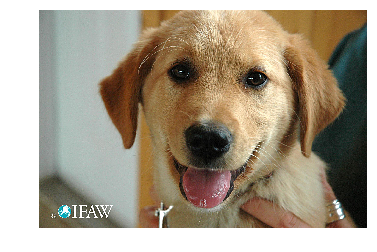

Blur


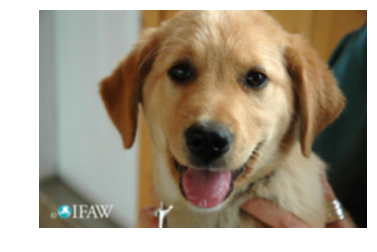

Log Compression


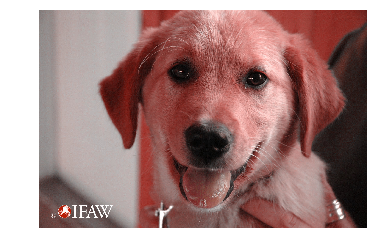

Contrast Stretch


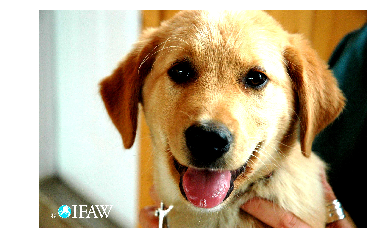

Histogram Equalization


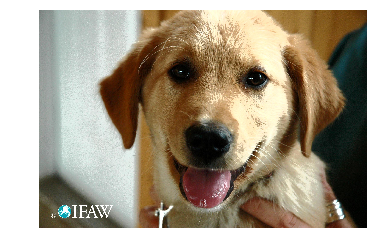

In [10]:
# Sharpening
resp = requests.post(
    "http://{}/api/process/sharpen".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
print('Sharpen')
view_image(b64str_to_numpy(content["image_data"]))

# blurring
resp = requests.post(
    "http://{}/api/process/blur".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
print('Blur')
view_image(b64str_to_numpy(content["image_data"]))

# log compression
resp = requests.post(
    "http://{}/api/process/log_compression".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
print('Log Compression')
view_image(b64str_to_numpy(content["image_data"]))

# contrast stretching
resp = requests.post(
    "http://{}/api/process/contrast_stretch".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
print('Contrast Stretch')
view_image(b64str_to_numpy(content["image_data"]))

# histogram equalization
resp = requests.post(
    "http://{}/api/process/hist_eq".format(domain),
    json=image_obj_2)
content = byte_2_json(resp)
print('Histogram Equalization')
view_image(b64str_to_numpy(content["image_data"]))


Note that reverse video only works for grayscale images. Here is a grayscale image to test

Original Gray Image:


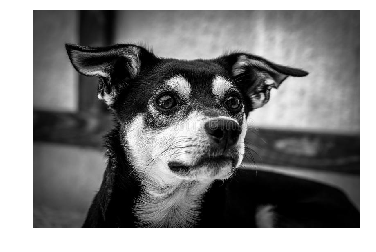

Reverse Video


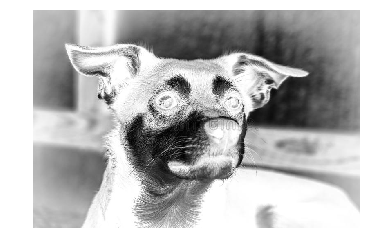

In [11]:
image_obj = {
    "email": email,
    "image_data": numpy_to_b64str(
        dog_image, format=image_format),
    "filename": dog_source
}
resp = requests.post(
    "http://{}/api/process/upload_image".format(domain),
    json=image_obj)
content = byte_2_json(resp)
print('Original Gray Image:')
view_image(b64str_to_numpy(content["image_data"]))
resp = requests.post(
    "http://{}/api/process/reverse_video".format(domain),
    json=image_obj)
content = byte_2_json(resp)
print('Reverse Video')
view_image(b64str_to_numpy(content["image_data"]))

## Step 4: Confirming
Note that none of the processing actions done on the initial image was permanent. In order to "commit" a change or processing function, you need to confirm with the `confirm` endpoint. This confirms the most recent action performed by the user

In [12]:
confirmed = requests.post(
    "http://{}/api/process/confirm".format(domain),
    json={"email": email})
confirmed = byte_2_json(resp)

## Step 5: Additional Features

Our webserver and database keeps track of every process that is used. Run the block of code below to see:

In [13]:
resp = requests.get(
    "http://{}/api/user/get_user/{}".format(domain, email))
content = byte_2_json(resp)
print(content["process_count"])

{'reverse_video': 1, 'blur': 1, 'log_compression': 1, 'contrast_stretch': 1, 'hist_eq': 1, 'sharpen': 1}


Every image also has a significant amount of metadata associated with it. These include: parent-child relationships with other
images, the upload timestamp, process time, image size, etc. They can be displayed below:

In [14]:
confirmed_2 = confirmed
del confirmed_2["image_data"] # Deleting the B64 string for readability
del confirmed_2["histogram"] # Deleting the B64 string for readability
print(confirmed_2)


{'width': 533, 'parent_id': 'ZEXKWVSGLX', 'description': 'None', 'image_id': 'ZDOWGUUGFO', 'email': 'blah@blah.com', 'filename': 'images_for_testing/gray_dog.jpg', 'timestamp': 'Fri, 14 Dec 2018 16:46:48 GMT', 'processing_time': 23, 'format': 'JPG', 'processing_history': ['ZEXKWVSGLX'], 'height': 800, 'child_ids': [], 'process': 'reverse_video'}


## Step 6: Downloading 

 Downloading comes in several different forms: single or zipped in a file with a file type or your choice. 
 
First let's explore single image downloads. In this example, the image is converted back into a numpy array and saved as `test.jpg` in the current folder of this Jupyter Notebook. The most recent reverse video grayscale image is what is saved.

In [15]:
resp = requests.post(
    "http://{}/api/process/reverse_video".format(domain),
    json=image_obj)
content = byte_2_json(resp)
save_this = b64str_to_numpy(content["image_data"])
imageio.imwrite('./test.jpg', save_this)


# Conclusion

There are many other functions that we have not demonstrated here, but this is the basic functionality of our webserver. All of these methods are wrapped up in our front-end GUI.